In [23]:
%matplotlib inline
import pandas as pd

## Load results

In [24]:
series = [
    'masked',
    'unmasked',
    'masked_reversed',
    'unmasked_reversed',
]
series = ['masked',
          'masked_no_symbolic',
          'masked_no_symbolic_no_selective',
          'masked_no_selective',
          'masked_symbolic_low_order',
          'unmasked',
          'unmasked_no_symbolic',
          'masked_reversed', 'unmasked_reversed']
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/analysis_new_property_raw_{s}.csv')
   for s in series 
}

## Raw results

In [25]:
from ipywidgets import interact

In [5]:
total_timess['masked'] = total_timess['masked'][0:10]
total_timess['unmasked'] = total_timess['unmasked'][0:10]
total_timess['masked_reversed'] = total_timess['masked_reversed'][0:10]
total_timess['unmasked_reversed'] = total_timess['unmasked_reversed'][10:20]

In [6]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('masked', 'masked_no_symbolic', 'masked_no_symbo…

## Comparison

In [7]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,masked_reversed,unmasked_reversed
Unnamed: 0,4.500000,24.500000,24.500000,24.500000,1.500000,4.500000,24.500000,4.500000,14.500000
Flow*,83.947878,84.303832,84.775831,85.804465,94.084688,87.226486,85.077899,86.246157,85.735142
P,12.366002,16.438029,21.699813,17.452275,13.901104,12.645872,18.157356,0.046508,11.516849
Q,77.601915,23.311948,30.190777,81.442837,30.832374,248.779155,60.604839,239.416987,316.364332
P | F(Q),90.073833,39.856544,51.996095,99.002345,44.843461,262.375336,78.866962,239.576461,327.999669
tentative eval,1.022773,0.967347,0.986085,1.028675,1.756680,3.379127,3.211617,0.809383,2.600633
root detection,0.030220,1.841480,2.359099,0.010688,0.529670,0.033151,5.338214,0.010949,0.023203
composing flowpipe,19.192891,35.859544,47.189443,42.714036,21.656222,32.662233,67.843146,16.177049,34.155940
composing atomic,69.077038,0.009595,0.009937,53.851489,20.061568,224.153545,0.019126,221.888905,289.403558
Total,174.172256,124.337667,136.921216,184.958752,139.068207,349.762131,164.118879,325.971810,413.890973


In [8]:
comparison.to_csv("data/comparison.csv")

In [9]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,masked_reversed,unmasked_reversed
Unnamed: 0,3.027650,14.577380,14.577380,14.577380,1.290994,3.027650,14.577380,3.027650,3.027650
Flow*,0.816529,1.240019,1.166172,1.145676,2.378731,6.042096,2.391533,1.269024,1.304141
P,0.624692,2.891838,4.053856,0.550821,0.447407,1.172638,3.345732,0.007792,0.456476
Q,6.276223,0.626569,0.820268,2.585989,1.458395,19.057198,2.918463,8.017783,9.453587
P | F(Q),6.478545,3.053084,4.120522,2.660900,1.513409,19.051776,4.768496,8.018334,9.458626
tentative eval,0.040542,0.062409,0.067746,0.076527,0.121345,0.187511,0.224358,0.010433,0.138067
root detection,0.008756,0.099819,0.099025,0.003595,0.014590,0.009750,0.234796,0.000748,0.004263
composing flowpipe,0.520375,2.892891,3.983435,0.691489,0.592442,1.187880,4.329612,0.164863,0.485912
composing atomic,6.288990,0.000530,0.000473,2.163184,0.906587,18.907008,0.000924,7.919964,9.120911
Total,6.235996,3.277487,4.339160,2.763047,1.846821,24.802127,6.309574,8.280708,9.074436


In [10]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,12.366002,77.601915
masked_no_symbolic,16.438029,23.311948
masked_no_symbolic_no_selective,21.699813,30.190777
masked_no_selective,17.452275,81.442837
masked_symbolic_low_order,13.901104,30.832374
unmasked,12.645872,248.779155
unmasked_no_symbolic,18.157356,60.604839
masked_reversed,0.046508,239.416987
unmasked_reversed,11.516849,316.364332


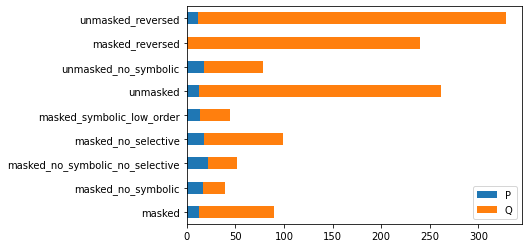

In [11]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [12]:
p.get_figure().savefig('images/comparison-analysis5-bar-chart-1.pdf')

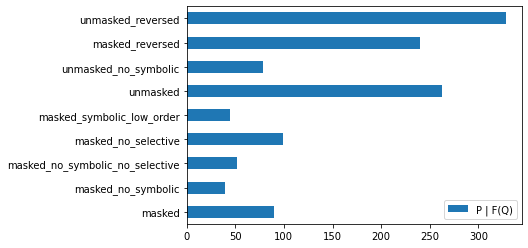

In [13]:
comparison3 = comparison.loc[['P | F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [14]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
masked,83.947878,12.366002,77.601915
masked_no_symbolic,84.303832,16.438029,23.311948
masked_no_symbolic_no_selective,84.775831,21.699813,30.190777
masked_no_selective,85.804465,17.452275,81.442837
masked_symbolic_low_order,94.084688,13.901104,30.832374
unmasked,87.226486,12.645872,248.779155
unmasked_no_symbolic,85.077899,18.157356,60.604839
masked_reversed,86.246157,0.046508,239.416987
unmasked_reversed,85.735142,11.516849,316.364332


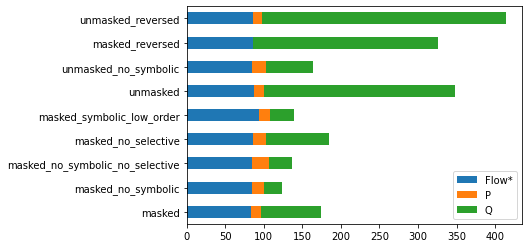

In [15]:
p = comparison4.plot(kind='barh', stacked=True, grid=False)
p

In [16]:
p.get_figure().savefig('images/comparison-analysis5-bar-chart-2.pdf')

In [17]:
comparison5 = comparison4.copy()

In [18]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

masked                             0.256461
masked_no_symbolic                 0.283858
masked_no_symbolic_no_selective    0.254795
masked_no_selective                0.259175
masked_symbolic_low_order          0.250041
unmasked                           1.110617
unmasked_no_symbolic               0.278785
masked_reversed                    0.262158
unmasked_reversed                  0.274651
dtype: float64

In [19]:
comparison5.loc[:,'Remainder'] = rem

In [20]:
comparison5

,Flow*,P,Q,Remainder
masked,83.947878,12.366002,77.601915,0.256461
masked_no_symbolic,84.303832,16.438029,23.311948,0.283858
masked_no_symbolic_no_selective,84.775831,21.699813,30.190777,0.254795
masked_no_selective,85.804465,17.452275,81.442837,0.259175
masked_symbolic_low_order,94.084688,13.901104,30.832374,0.250041
unmasked,87.226486,12.645872,248.779155,1.110617
unmasked_no_symbolic,85.077899,18.157356,60.604839,0.278785
masked_reversed,86.246157,0.046508,239.416987,0.262158
unmasked_reversed,85.735142,11.516849,316.364332,0.274651


In [21]:
comparison5.to_csv("data/comparison-remainder.csv")

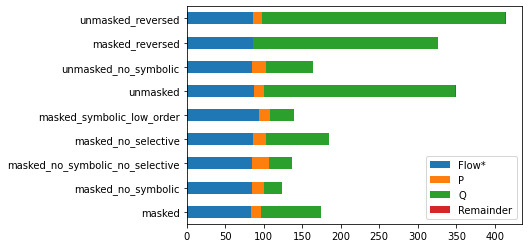

In [22]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [74]:
_.get_figure().savefig(
    'images/key-comparison-bar-chart.pdf')

In [75]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [76]:
comparison6

,Flow*,P,Q,Total
Masked,92.548980,5.981380,0.365059,99.141424
Unmasked,92.416499,18.755163,83.170755,194.590718
Masked R,92.546300,0.263067,32.291056,125.365845
Unmasked R,92.391264,19.835058,82.918375,195.389225


In [77]:
comparison6.to_csv('data/key-comparison.csv')